In [55]:
import pandas as pd

In [56]:
import matplotlib.pyplot as plt

In [57]:
import seaborn as sns

In [58]:
import numpy as np

In [59]:
data = pd.read_csv("dpwh_flood_control_projects_(cleaned).csv")

In [25]:
print(data.shape)
print(data.columns.tolist())
display(data.head())

(9855, 24)
['Region', 'Province', 'TypeOfWork', 'FundingYear', 'ApprovedBudgetForContract', 'ContractCost', 'ActualCompletionDate', 'StartDate', 'Contractor', 'ContractId', 'ProjectId', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23']


,Region,Province,TypeOfWork,FundingYear,ApprovedBudgetForContract,ContractCost,ActualCompletionDate,StartDate,Contractor,ContractId,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,XIV,Apayao,Construction of Flood Mitigation Structure,2021,96500000,92692943.8,10/3/2022,3/18/2021,ASC CONSTRUCTION & CONCRETE PRODUCTS,21PC0018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,XIV,Apayao,Construction of Flood Mitigation Structure,2021,49000000,47521251.3,11/24/2022,12/1/2021,ASC CONSTRUCTION & CONCRETE PRODUCTS,21PC0019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,XIV,Apayao,Construction of Flood Mitigation Structure,2021,47423180,45942583.67,11/28/2022,12/1/2021,ASC CONSTRUCTION & CONCRETE PRODUCTS,21PC0010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,XIV,Apayao,Construction of Flood Mitigation Structure,2021,9900000,9900000,12/15/2022,12/1/2021,ASC CONSTRUCTION & CONCRETE PRODUCTS,21PC0067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,XIV,Apayao,Construction of Flood Mitigation Structure,2021,4950000,4950000,9/23/2022,12/1/2021,ALEPHNORTH PEAK CONSTRUCTION AND DEVELOPMENT CO.,21PC0034,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
#drop empty columns
data = data.dropna(axis=1, how='all')
display(data.head())

,Region,Province,TypeOfWork,FundingYear,ApprovedBudgetForContract,ContractCost,ActualCompletionDate,StartDate,Contractor,ContractId,ProjectId
0,XIV,Apayao,Construction of Flood Mitigation Structure,2021,96500000,92692943.8,10/3/2022,3/18/2021,ASC CONSTRUCTION & CONCRETE PRODUCTS,21PC0018,P00526268LZ
1,XIV,Apayao,Construction of Flood Mitigation Structure,2021,49000000,47521251.3,11/24/2022,12/1/2021,ASC CONSTRUCTION & CONCRETE PRODUCTS,21PC0019,P00526368LZ
2,XIV,Apayao,Construction of Flood Mitigation Structure,2021,47423180,45942583.67,11/28/2022,12/1/2021,ASC CONSTRUCTION & CONCRETE PRODUCTS,21PC0010,P00526369LZ
3,XIV,Apayao,Construction of Flood Mitigation Structure,2021,9900000,9900000,12/15/2022,12/1/2021,ASC CONSTRUCTION & CONCRETE PRODUCTS,21PC0067,P00561270LZ
4,XIV,Apayao,Construction of Flood Mitigation Structure,2021,4950000,4950000,9/23/2022,12/1/2021,ALEPHNORTH PEAK CONSTRUCTION AND DEVELOPMENT CO.,21PC0034,P00561652LZ


In [27]:
#clean money-like columns (remove commas/currency signs -> numeric)
def clean_money(series):
    return pd.to_numeric(series.astype(str).str.replace(r'[^\d\.-]', '', regex=True), errors='coerce')

In [28]:
data['ApprovedBudgetForContract'] = clean_money(data['ApprovedBudgetForContract'])
data['ContractCost'] = clean_money(data['ContractCost'])

In [29]:
#parse data columns
for d in ['StartDate', 'ActualCompletionDate']:
    if d in data.columns:
        data[d] = pd.to_datetime(data[d], errors='coerce')

In [30]:
#recheck all changes
data[['ApprovedBudgetForContract','ContractCost','StartDate','ActualCompletionDate']].head()

,ApprovedBudgetForContract,ContractCost,StartDate,ActualCompletionDate
0,96500000.0,92692943.80,2021-03-18,2022-10-03
1,49000000.0,47521251.30,2021-12-01,2022-11-24
2,47423180.0,45942583.67,2021-12-01,2022-11-28
3,9900000.0,9900000.00,2021-12-01,2022-12-15
4,4950000.0,4950000.00,2021-12-01,2022-09-23


In [32]:
#convert funding year to numeric
if 'FundingYear' in data.columns:
    data['FundingYear'] = pd.to_numeric(data['FundingYear'], errors='coerce')

In [39]:
#add aditional columns

#project duration in days (may be negative if dates is missing)
data['Project Duration'] = (data['ActualCompletionDate'] - data['StartDate']).dt.days

#cost overrun column
data['Cost Overrun'] = (data['ContractCost'] - data['ApprovedBudgetForContract'])

#project deficit column
data['Project Deficit'] = (data['ApprovedBudgetForContract'] - data['ContractCost'])

In [41]:
#count of project by region and province
projects_by_regions = data['Region'].value_counts()
projects_by_provinces = data['Province'].value_counts()

In [43]:
#budgets by funding year
budgets_by_year = data.groupby('FundingYear')['ApprovedBudgetForContract'].sum().sort_index()

In [44]:
#median duration by type of work
median_duration = data.groupby('TypeOfWork')['Project Duration'].median().sort_values()

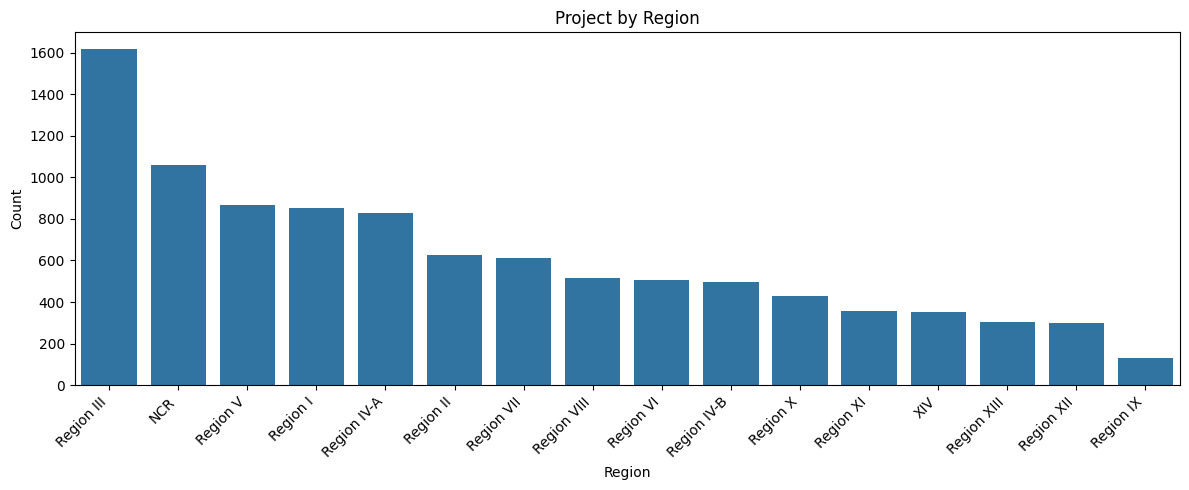

In [47]:
#sample visualization

#Projects per Region
region_count = data['Region'].value_counts().reset_index()
region_count.columns = ['Region', 'Count']

plt.figure(figsize=(12, 5))
sns.barplot(data=region_count, x='Region', y='Count')
plt.xticks(rotation=45, ha='right')
plt.title('Project by Region')
plt.tight_layout()
plt.show()

In [60]:
# Regression 1: Budget -> Contract Cost

# 1. Convert columns to numeric BEFORE selecting X and Y
data['ApprovedBudgetForContract'] = pd.to_numeric(data['ApprovedBudgetForContract'], errors='coerce')
data['ContractCost'] = pd.to_numeric(data['ContractCost'], errors='coerce')

In [61]:
# 2. Remove all rows with missing or invalid numeric values
reg1 = data[['ApprovedBudgetForContract', 'ContractCost']].dropna()

In [62]:
# 3. Define X and Y AFTER cleaning
X = reg1[['ApprovedBudgetForContract']]  # must be 2D for sklearn
Y = reg1['ContractCost']

In [63]:
# 4. Build model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model1 = LinearRegression()
model1.fit(X, Y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [64]:
# 5. Predictions
pred1 = model1.predict(X)

In [65]:
# 6. Metrics
slope1 = model1.coef_[0]
intercept1 = model1.intercept_
r2_1 = r2_score(Y, pred1)

print("Regression 1 Results:")
print("Slope:", slope1)
print("Intercept:", intercept1)
print("R-squared:", r2_1)

Regression 1 Results:
Slope: 0.9739902202700446
Intercept: 610409.0792995244
R-squared: 0.9773248752919147


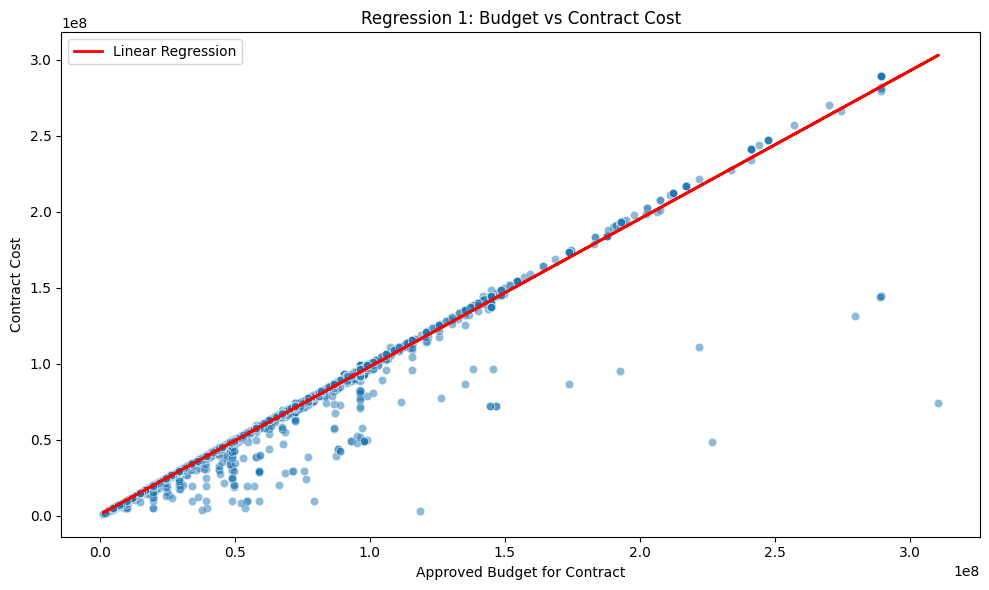

In [67]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reg1['ApprovedBudgetForContract'], y=reg1['ContractCost'], alpha=0.5)
plt.plot(reg1['ApprovedBudgetForContract'], pred1, color='red', linewidth=2, label='Linear Regression')
plt.xlabel("Approved Budget for Contract")
plt.ylabel("Contract Cost")
plt.title("Regression 1: Budget vs Contract Cost")
plt.legend()
plt.tight_layout()
plt.show()

### Regression 1 Analysis: Approved Budget → Contract Cost

1. **Relationship**  
The scatter plot reveals a near-perfect linear relationship between the Approved Budget and Contract Cost: as the budget increases, the final cost increases proportionally. This suggests consistent cost planning across DPWH Flood Control Projects.

2. **Coefficient of Determination ($R^2$)**  
- **Value:** $R^2 = 0.977$  
- **Interpretation:** 97.7% of the variance in Contract Cost is explained by the Approved Budget. This extremely high value indicates the linear model fits the data exceptionally well.

3. **Strength and Direction**  
- **Strength:** The closeness of points to the regression line confirms a very strong correlation. Contract Cost is highly predictable from the approved budget.  
- **Direction:** Positive slope, close to 1, indicates that increases in budget correspond almost dollar-for-dollar with increases in final cost.

4. **Outliers and Residuals**  
- **Below the Line:** A few contracts were completed under budget, suggesting some efficiency or cost-saving measures.  
- **Above the Line:** A small number of projects exceeded their budget slightly.  
- **Contrast:** While the data shows very few deviations, the near-perfect alignment might appear suspicious given public discourse around DPWH Flood Control Projects and allegations of overpricing or mismanagement. These outliers, although minimal, remind us that numbers alone may not capture the full context of project execution.

5. **Conclusion**  
The Approved Budget remains a strong predictor of Contract Cost, implying effective budget management. However, the few outliers and the unusually tight fit highlight the importance of examining procurement practices, project scope, and potential irregularities to ensure transparency and accountability.

In [69]:
# Regression 2: Project Duration -> Contract Cost

# Ensure dates are datetime objects
data['StartDate'] = pd.to_datetime(data['StartDate'], errors='coerce')
data['ActualCompletionDate'] = pd.to_datetime(data['ActualCompletionDate'], errors='coerce')

In [70]:
# Calculate Project Duration in days
data['Project Duration'] = (data['ActualCompletionDate'] - data['StartDate']).dt.days


In [71]:
# Prepare regression dataset and drop missing values
reg2 = data[['Project Duration', 'ContractCost']].dropna()

In [72]:
# Independent (X) and Dependent (Y) variables
X2 = reg2[['Project Duration']]  
Y2 = reg2['ContractCost']

In [73]:
# Initialize and fit the linear regression model
model2 = LinearRegression()
model2.fit(X2, Y2)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [74]:
# Predict Contract Cost
pred2 = model2.predict(X2)

In [75]:
# Regression coefficients
slope2 = model2.coef_[0]
intercept2 = model2.intercept_
r2_2 = r2_score(Y2, pred2)

In [76]:
print("Regression 2 Results:")
print("Slope:", slope2)
print("Intercept:", intercept2)
print("R-squared:", r2_2)

Regression 2 Results:
Slope: 86178.1551544944
Intercept: 34268616.986487225
R-squared: 0.08622000757588677


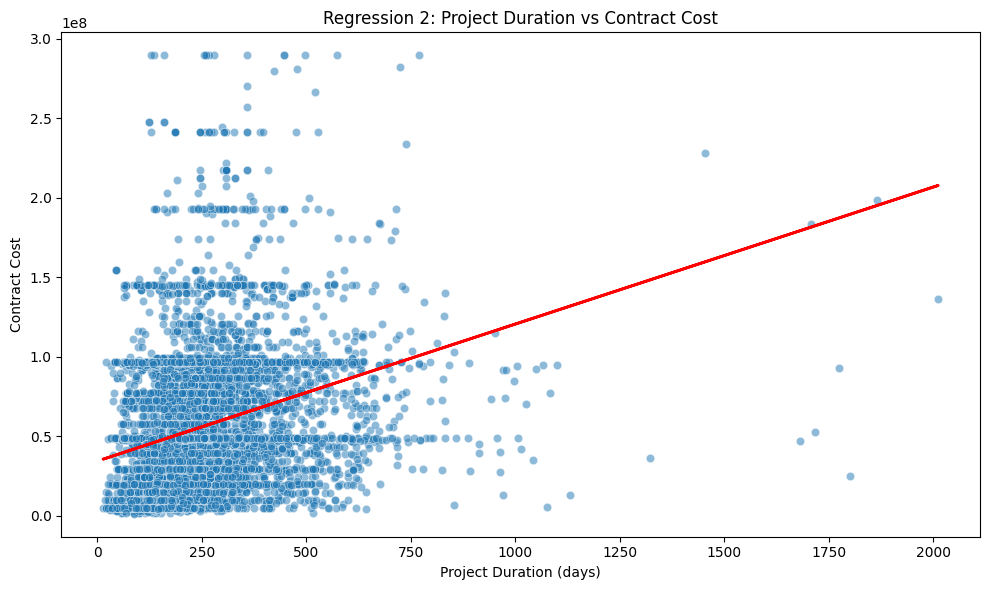

In [77]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=reg2['Project Duration'], y=reg2['ContractCost'], alpha=0.5)
plt.plot(reg2['Project Duration'], pred2, color='red', linewidth=2)
plt.xlabel("Project Duration (days)")
plt.ylabel("Contract Cost")
plt.title("Regression 2: Project Duration vs Contract Cost")
plt.tight_layout()
plt.show()

# Regression 2 Analysis: Project Duration → Contract Cost

**Slope:** 86,178.16  
**Intercept:** 34,268,617.0  
**R-squared:** 0.086  

---

### 1. The Relationship
The scatter plot shows the data points widely dispersed around the regression line, indicating that **Project Duration is a weak predictor of Contract Cost**. Unlike the near-perfect linearity seen with budget vs cost, duration does not explain most of the variation in expenses.

---

### 2. Strength and Direction
- **Direction:** Positive slope – projects with longer durations tend to have slightly higher costs on average.  
- **Strength:** Very weak correlation. Most Contract Cost variability is **not captured by project duration**, reflected in the low $R^2$ (~0.086), meaning only about 8.6% of the variance in cost is explained by duration.

---

### 3. Data Distribution and Patterns
- **High Density at Lower Durations:** Most projects finish within ~750 days, but costs vary drastically—from nearly zero to hundreds of millions.  
- **High Variability:** For any fixed duration, costs span a huge range. For instance, projects around 250 days can cost anywhere across the spectrum. This explains why the linear fit is poor.  
- **Outliers at Long Durations:** A few extremely long projects (e.g., >1,500 days) pull the regression line upward, but they represent only a small subset.

---

### 4. Contrast with Budget → Contract Cost
While budget was an almost perfect predictor of contract cost, **duration shows almost no predictive power**. This contrast suggests that **DPWH project timelines are not strongly tied to final expenditures**, which may hint at other underlying factors such as contract management practices, scope adjustments, or delays that do not proportionally increase costs.

---

### 5. Conclusion
Project Duration alone is **not a reliable metric for estimating contract cost**. For DPWH Flood Control Projects, this implies that project planning, efficiency, or potential delays **do not systematically translate into higher expenditures**. Costs are likely driven more by project scope, budget allocation, materials, or other administrative factors than by how long a project takes to complete.

In [78]:
# Regression 3: Budget -> Project Duration
reg3 = data[['ApprovedBudgetForContract', 'Project Duration']].dropna()

In [79]:
# Independent and dependent variables
X3 = reg3[['ApprovedBudgetForContract']]
Y3 = reg3['Project Duration']


In [80]:
model3 = LinearRegression()
model3.fit(X3, Y3)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [81]:
pred3 = model3.predict(X3)

In [82]:
# Coefficients
slope3 = model3.coef_[0]
intercept3 = model3.intercept_
r2_3 = r2_score(Y3, pred3)

In [83]:
print("Regression 3 Results:")
print("Slope:", slope3)
print("Intercept:", intercept3)
print("R-squared:", r2_3)

Regression 3 Results:
Slope: 1.0013961513124965e-06
Intercept: 190.01557998389552
R-squared: 0.08863575907981391


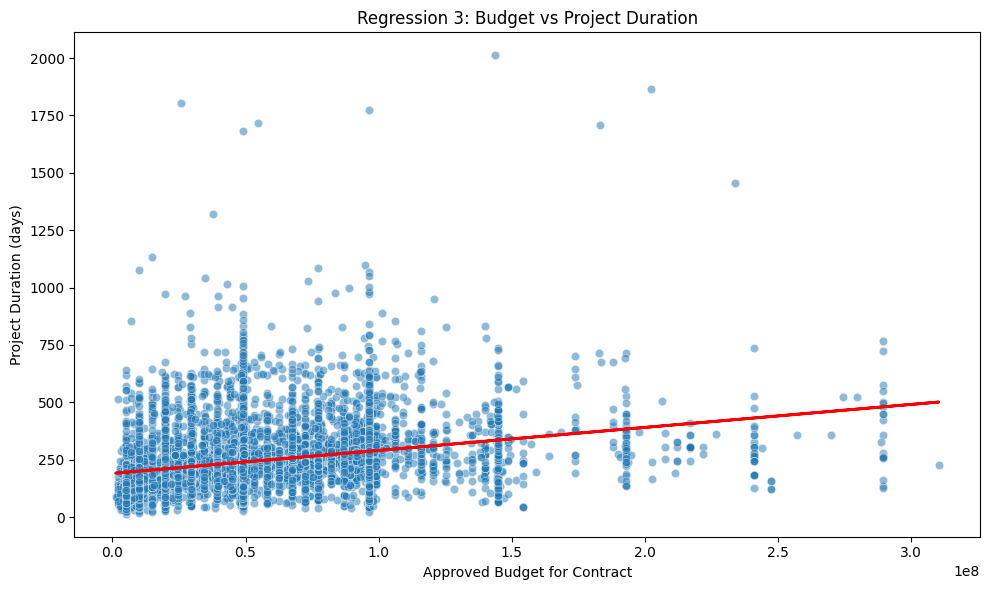

In [84]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=reg3['ApprovedBudgetForContract'], y=reg3['Project Duration'], alpha=0.5)
plt.plot(reg3['ApprovedBudgetForContract'], pred3, color='red', linewidth=2)
plt.xlabel("Approved Budget for Contract")
plt.ylabel("Project Duration (days)")
plt.title("Regression 3: Budget vs Project Duration")
plt.tight_layout()
plt.show()

# Regression 3 Analysis: Budget -> Project Duration

## 1. The Relationship
The scatter plot shows that the data points are extremely dispersed. This visual evidence confirms there is **no strong, clear linear trend** between the Approved Budget for Contract (independent variable, $x$) and Project Duration in days (dependent variable, $y$).

## 2. Coefficient of Determination ($R^2$)
**Value:** $R^2 = 0.0886$  
**Interpretation:** Only **8.86%** of the variation in Project Duration can be explained by the Approved Budget. The remaining **91.14%** of variability is due to factors other than the budget. This low $R^2$ confirms the model is a very poor fit for the data.

## 3. Regression Equation Parameters
The linear regression equation is:

$$
y = \text{Slope} \cdot x + \text{Intercept}
$$

- **Slope:** $1.001 \times 10^{-6}$  
  This positive value indicates that for every increase of one dollar in the Approved Budget, the Project Duration increases by only $1.001 \times 10^{-6}$ days. Visually, this produces the very shallow, almost flat regression line.

- **Intercept:** 190.02 days  
  A project with a hypothetical zero budget is predicted to last approximately 190 days.

## 4. Data Distribution and Outliers
- **High Variability:** For most budget levels (especially below $1.5 \times 10^8$), project durations range from nearly 0 days up to 1,750 days or more. This explains the low predictive power of the model.  
- **Outliers / High Leverage Points:** A few projects with extremely long durations (e.g., above 1,500 days) occur across the budget spectrum. These outliers inflate scatter and weaken correlation.

## 5. Conclusion and Implications
- The **Approved Budget** has **negligible predictive power** regarding Project Duration.  
- High-budget projects are **not necessarily longer**, and longer projects are **not necessarily more expensive**.  
- Project duration is largely determined by **factors not included** in this model, such as project scope complexity, regulatory requirements, resource availability, project type, or external dependencies.

# Overall Summary of Regression Analyses

This summary compares three key regressions exploring relationships among **Approved Budget**, **Project Duration**, and **Contract Cost** for DPWH Flood Control Projects.

---

## 1. Regression: Approved Budget → Contract Cost

- **Slope:** 0.974  
- **Intercept:** 610,409  
- **R-squared:** 0.977  

**Key Insights:**  
- Near-perfect linear relationship; as budget increases, contract cost increases almost dollar-for-dollar.  
- The model explains **97.7% of cost variability**, showing budget is the primary predictor of final expenditure.  
- Outliers are minimal; some projects finished under or slightly over budget.  
- **Contrast/Context:** The exceptionally high $R^2$ may appear suspicious given public concerns about DPWH project cost management, even though it reflects tight budget control mathematically.

---

## 2. Regression: Project Duration → Contract Cost

- **Slope:** 86,178  
- **Intercept:** 34,268,617  
- **R-squared:** 0.086  

**Key Insights:**  
- Weak relationship; project duration poorly predicts contract cost.  
- Only **8.6% of cost variability** is explained by duration.  
- Wide cost ranges for similar durations suggest other factors—scope, materials, labor, or administrative adjustments—drive spending.  
- **Implication:** Longer projects do not necessarily cost more, highlighting inconsistent cost-time dynamics.

---

## 3. Regression: Approved Budget → Project Duration

- **Slope:** 1.001 × 10⁻⁶  
- **Intercept:** 190.02 days  
- **R-squared:** 0.089  

**Key Insights:**  
- Extremely weak linear trend; budget barely predicts project duration.  
- Only **8.9% of duration variability** is explained by budget.  
- High variation in project timelines for similar budgets points to external factors like complexity, approvals, resources, or environmental conditions.  
- **Implication:** High-budget projects are not automatically longer, and low-budget projects are not necessarily faster.

---

## Synthesis Across Regressions

| Regression | R-squared | Main Takeaway |
|------------|-----------|---------------|
| Budget → Cost | 0.977 | Budget is the strongest predictor of cost; near-perfect fit may indicate mechanically determined costs or unusually tight budget adherence. |
| Duration → Cost | 0.086 | Duration is a weak predictor of cost; spending is influenced by factors beyond project timeline. |
| Budget → Duration | 0.089 | Budget has minimal effect on project duration; timelines are driven by operational, technical, or external factors. |

---

## Overall Conclusion

1. **Cost is almost entirely budget-driven**, confirming that approved budgets largely determine final expenditures.  
2. **Project duration is mostly independent** of both budget and cost, suggesting efficiency varies and is influenced by factors not captured in the model.  
3. The **contrast between tight budget-cost alignment and weak duration effects** highlights the importance of scrutinizing project execution beyond simple financial planning.  
4. **Policy Implication:** Monitoring timelines, efficiency, and outliers is essential to ensure transparency, accountability, and optimal resource utilization in DPWH Flood Control Projects.